## Truncamiento de Distribuciones

#### Definición
El truncamiento de una distribución consiste en restringir una distribución de probabilidad a un subconjunto específico de valores, eliminando y renormalizando la probabilidad fuera de ese rango. Esto se utiliza para modelar fenómenos donde los valores extremos están limitados o excluidos.

##### Tipos de Truncamiento
- **Valores Absolutos**: Se limita la distribución a un rango específico de valores, estableciendo un limite inferior *a* y un limite superior *b*. La funcion de densidad se ajusta para que para que el area bajo la curva en el rango [a,b] sea igual a 1.

- **Desviacion Estandar**: Se limita la distribución a un rango de valores que se encuentran dentro de un cierto número de desviaciones estándar de la media. Se establece un valor de desviación estándar *k* y se eliminan los valores que se encuentran a más de *k* desviaciones estándar de la media. La función de densidad se ajusta para que el area bajo la curva en el rango [μ-kσ, μ+kσ] sea igual a 1.

- **Percentiles**: Se elimina un porcentaje específico de los valores más extremos de la distribución. La función de densidad se ajusta para que el area bajo la curva en el rango [p1,p2] sea igual a 1.

### Funciones de Truncamiento
Sea f(x) la función de densidad de probabilidad y F(x) la función de distribución acumulada de una distribución de probabilidad. La función de truncamiento T(x) se define como:
$$
T(x) = \frac{f(x)}{F(b) - F(a)}
$$

Donde a y b son los límites inferior y superior de la distribución truncada, respectivamente.








***

### Distribución Exponencial
La distribución exponencial es una distribución de probabilidad continua que describe el tiempo entre eventos en un proceso de Poisson. Esta distribucion ya tiene un limite inferior natural, es por esto que solo truncaremos el limite superior. La función de densidad de probabilidad de la distribución exponencial es:
$$
f(x) = 
\begin{cases}
\frac{1}{\beta} e^{-x/\beta}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$

Donde $\beta$ es el parámetro de escala de la distribución exponencial. La función de distribución acumulada de la distribución exponencial es:
$$
F(x) =
\begin{cases}
1 - e^{-x/\beta}, & x \geq 0 \\
0, & x < 0
\end{cases}
$$


### Distribución Truncada Exponencial
1. **Valores Absolutos**: Se limita la distribución exponencial a un limite superior especifico **b**. La función de densidad de probabilidad de la distribución truncada exponencial es:
$$
f(x) =
\begin{cases}
\frac{\frac{1}{\beta} e^{-x/\beta}} {(1-e^{-b/\beta})}, & 0 \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

2. **Desviación Estándar**: Se limita la distribución exponencial a un rango de valores que se encuentran dentro de un cierto número de desviaciones estándar de la media. La función de densidad de probabilidad de la distribución truncada exponencial es:
$$
f(x) =
\begin{cases}
\frac{\frac{1}{\beta} e^{-x/\beta}} {(1-e^{(k\sigma-\mu)/\beta})}, & 0 \leq x \leq \mu + k\sigma \\
0, & \text{en otro caso}
\end{cases}
$$

3. **Percentiles**: Se elimina un porcentaje específico de los valores más extremos de la distribución exponencial. La función de densidad de probabilidad de la distribución truncada exponencial es:
$$
b = -\beta ln(1-p)
$$
$$
f(x) =
\begin{cases}
\frac{\frac{1}{\beta} e^{-x/\beta}} {(1-e^{-b/\beta})}, & 0 \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$


##### Librerias necesarias

In [58]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

##### Parametros y Distribución Exponencial

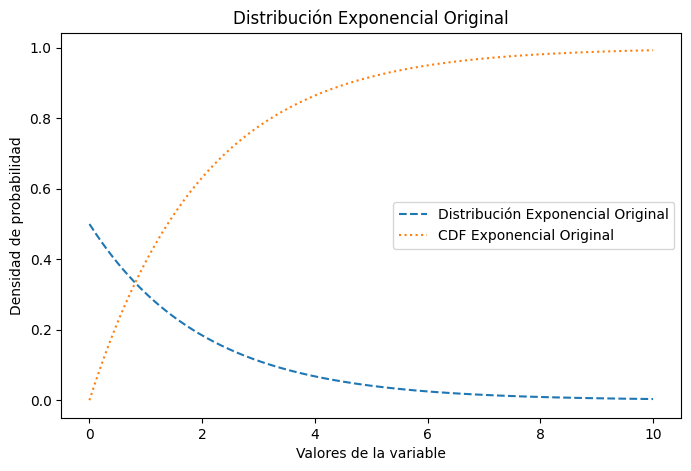

In [59]:
beta = 2
loc = 0  # Parámetro de localización
scale = beta  # Parámetro de escala

# Definimos una distribución exponencial sin truncamiento
x = np.linspace(0,10,1000)
pdf_original = stats.expon.pdf(x, loc=loc, scale=scale)
cdf_original = stats.expon.cdf(x, loc=loc, scale=scale)


#Graficamos la distribución original
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_original, label='Distribución Exponencial Original', linestyle='dashed')
plt.plot(x, cdf_original, label='CDF Exponencial Original', linestyle='dotted')
plt.legend()
plt.title("Distribución Exponencial Original")
plt.xlabel("Valores de la variable")
plt.ylabel("Densidad de probabilidad")
plt.show()



#### 1. Truncamiento de Valores Absolutos

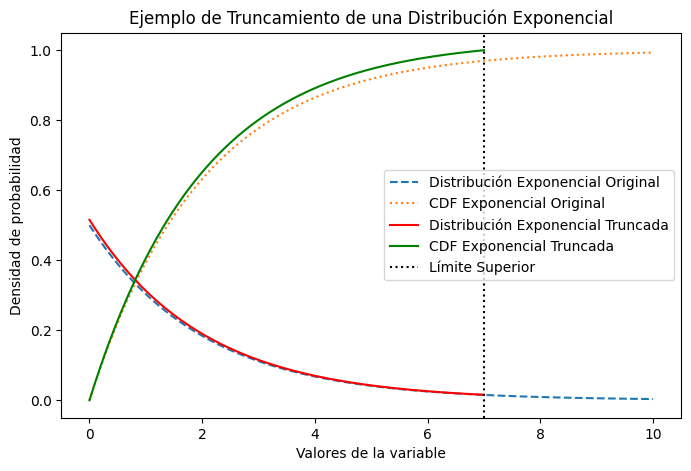

In [77]:


# Definir los límites de truncamiento
# Definimos solo el límite superior de truncamiento
upper = 7  # Valor máximo permitido

# Para truncexpon, b es el límite superior en unidades estandarizadas desde loc
b = (upper-loc)/ scale
trunc_exp = stats.truncexpon(b=b, loc=loc, scale=scale)

# Creamos valores dentro del rango truncado
t_x = np.linspace(0, upper, 1000)
t_pdf = trunc_exp.pdf(t_x)
t_cdf = trunc_exp.cdf(t_x)


# Graficamos la distribución original y la truncada
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_original, label='Distribución Exponencial Original', linestyle='dashed')
plt.plot(x, cdf_original, label='CDF Exponencial Original', linestyle='dotted')
plt.plot(t_x, t_pdf, label='Distribución Exponencial Truncada', color='red')
plt.plot(t_x, t_cdf, label='CDF Exponencial Truncada', color='green')
plt.axvline(upper, color='black', linestyle='dotted', label='Límite Superior')
plt.legend()
plt.title("Ejemplo de Truncamiento de una Distribución Exponencial")
plt.xlabel("Valores de la variable")
plt.ylabel("Densidad de probabilidad")
plt.show()




##### 2. Truncamiento por Desviación Estándar

Mean: 3.0, Variance: 9.0, Skewness: 2.0, Kurtosis: 6.0
Desviación Estándar: 3.0


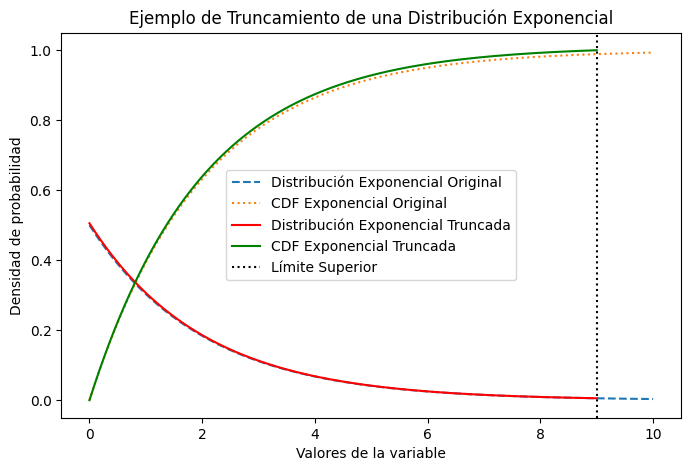

In [78]:

# Calculate the statistics of the truncated exponential distribution
mean, var, skew, kurt = stats.expon.stats(loc=0, scale=beta,moments='mvsk')
print(f"Mean: {mean}, Variance: {var}, Skewness: {skew}, Kurtosis: {kurt}")

#Desviacion estandar
std = np.sqrt(var)
print(f"Desviación Estándar: {std}")

#Numero de desviaciones estandar
k = 2
upper_limit = mean + k * std

upper_limit_norm = (upper_limit - loc) / scale
tstd = stats.truncexpon(b=upper_limit_norm, loc=loc, scale=scale)
t_x = np.linspace(0, upper_limit, 1000)
t_pdf = tstd.pdf(t_x)
t_cdf = tstd.cdf(t_x)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_original, label='Distribución Exponencial Original', linestyle='dashed')
plt.plot(x, cdf_original, label='CDF Exponencial Original', linestyle='dotted')
plt.plot(t_x, t_pdf, label='Distribución Exponencial Truncada', color='red')
plt.plot(t_x, t_cdf, label='CDF Exponencial Truncada', color='green')
plt.axvline(upper_limit, color='black', linestyle='dotted', label='Límite Superior')
plt.legend()
plt.title("Ejemplo de Truncamiento de una Distribución Exponencial")
plt.xlabel("Valores de la variable")
plt.ylabel("Densidad de probabilidad")
plt.show()





##### 3. Truncamiento por Percentiles

Percentil 95: 4.605170185988092


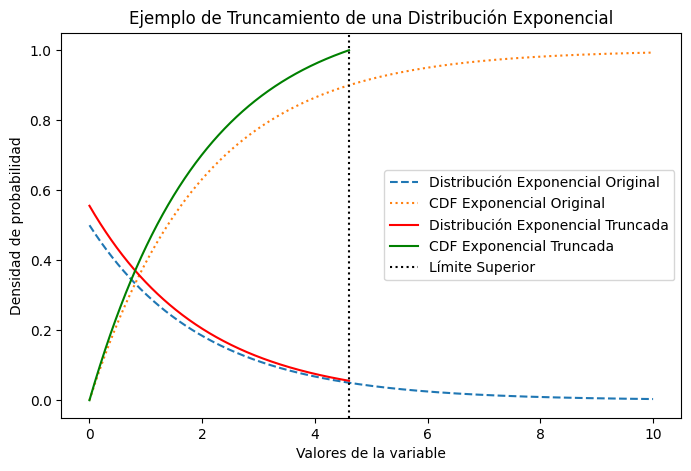

In [80]:
p=0.90
b=stats.expon.ppf(p, loc=loc, scale=scale)
print(f"Percentil 95: {b}")
upper_limit = (b - loc)/scale
tstd = stats.truncexpon(b=upper_limit, loc=loc, scale=scale)
t_x = np.linspace(0, b, 1000)
t_pdf = tstd.pdf(t_x)
t_cdf = tstd.cdf(t_x)

# Graficamos la distribución original y la truncada
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_original, label='Distribución Exponencial Original', linestyle='dashed')
plt.plot(x, cdf_original, label='CDF Exponencial Original', linestyle='dotted')
plt.plot(t_x, t_pdf, label='Distribución Exponencial Truncada', color='red')
plt.plot(t_x, t_cdf, label='CDF Exponencial Truncada', color='green')
plt.axvline(b, color='black', linestyle='dotted', label='Límite Superior')
plt.legend()
plt.title("Ejemplo de Truncamiento de una Distribución Exponencial")
plt.xlabel("Valores de la variable")
plt.ylabel("Densidad de probabilidad")
plt.show()
